In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

Import data

In [8]:
from functions import pulldata
df = pulldata('select * from citizens where "state" = "NY"')
df.reset_index(drop=True,inplace=True)

In [9]:
#drop unneeded columns
df.drop(['name','lawenforcementagency','streetaddress'],axis=1,inplace=True)
vc=df.drop(['age','day','year','city','state','latitude','longitude'],axis=1)

Male      49
Female     3
Name: gender, dtype: int64

Male      0.942308
Female    0.057692
Name: gender, dtype: float64

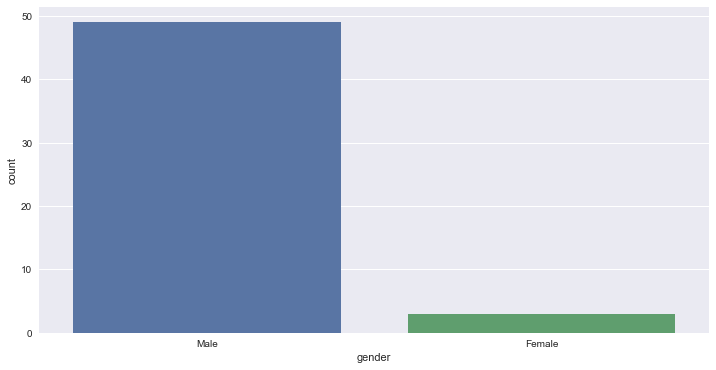

Black                     24
White                     21
Hispanic/Latino            4
Unknown                    2
Asian/Pacific Islander     1
Name: raceethnicity, dtype: int64

Black                     0.461538
White                     0.403846
Hispanic/Latino           0.076923
Unknown                   0.038462
Asian/Pacific Islander    0.019231
Name: raceethnicity, dtype: float64

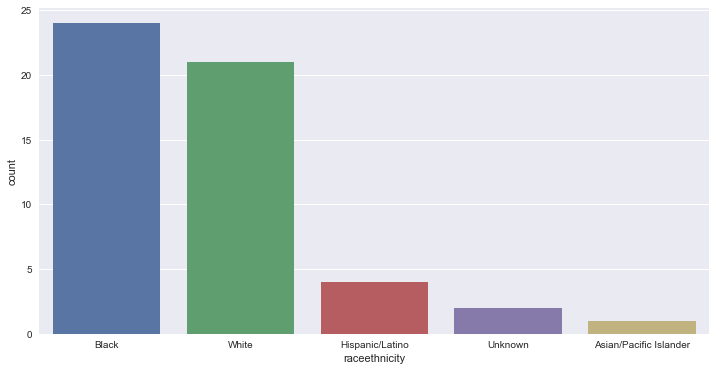

Firearm               23
No                    15
Knife                  6
Other                  5
Non-lethal firearm     2
Vehicle                1
Name: armed, dtype: int64

Firearm               0.442308
No                    0.288462
Knife                 0.115385
Other                 0.096154
Non-lethal firearm    0.038462
Vehicle               0.019231
Name: armed, dtype: float64

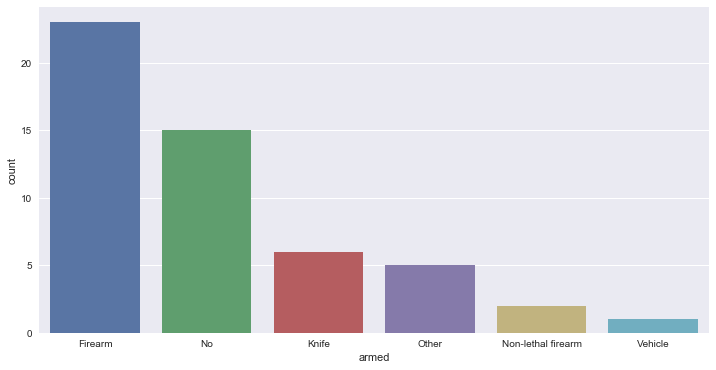

April        9
June         9
May          6
March        5
July         5
November     4
February     4
August       3
October      3
September    2
January      1
December     1
Name: month, dtype: int64

April        0.173077
June         0.173077
May          0.115385
March        0.096154
July         0.096154
November     0.076923
February     0.076923
August       0.057692
October      0.057692
September    0.038462
January      0.019231
December     0.019231
Name: month, dtype: float64

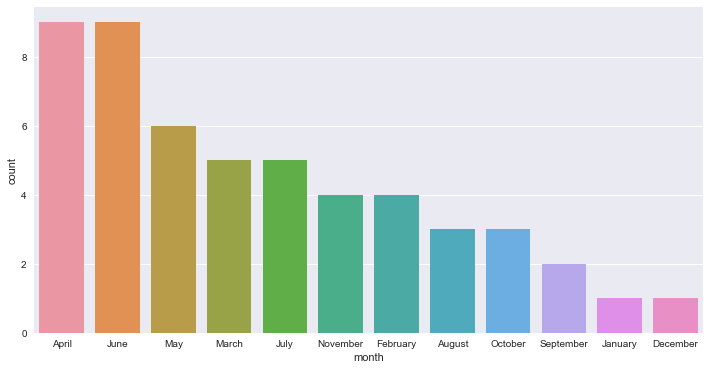

Gunshot              41
Taser                 5
Death in custody      4
Struck by vehicle     2
Name: classification, dtype: int64

Gunshot              0.788462
Taser                0.096154
Death in custody     0.076923
Struck by vehicle    0.038462
Name: classification, dtype: float64

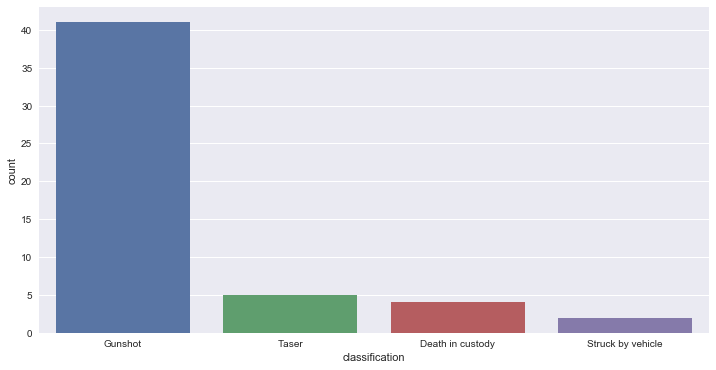

In [10]:
#print number of instances, percentages, and bar graph for each category
for col in list(vc.columns):
    df[col].value_counts()
    df[col].value_counts(normalize=True)
    sns.countplot(df[col],order=df[col].value_counts().index)
    plt.show()

## NY Numbers

94% Male
### Race
White                     0.403846

Black                     0.461538

Hispanic/Latino           0.076923
### Weapon
Firearm               0.442308

No                    0.288462

Knife                 0.115385

Let's compare that to National Numbers:

## National Numbers

95% Male
## Race
White                     0.509599

Black                     0.267888

Hispanic/Latino           0.170157

## Weapon
Firearm               0.483421

No                    0.205061

Knife                 0.132635


Blacks account for only 12.3% of the US population and have been involved in 26.8% of police shootings

-----------------------------------------------   Second degree analysis   --------------------------------------------------

What percent of blacks had guns? What percent of whites had guns?

In [11]:
df[df['armed']=='Firearm']['raceethnicity'].value_counts()

Black      11
White      11
Unknown     1
Name: raceethnicity, dtype: int64

In [12]:
'{} % of blacks had guns'.format(round(100*140/307,2))

'45.6 % of blacks had guns'

In [13]:
'{} % of whites had guns'.format(round(100*306/584,2))

'52.4 % of whites had guns'

So whites were armed more often than blacks

Let's look at unarmed whites and blacks

In [14]:
df[df['armed']=='No']['raceethnicity'].value_counts()

Black              8
White              4
Hispanic/Latino    3
Name: raceethnicity, dtype: int64

In [15]:
'percent of whites who were unarmed {} %:'.format(round(100*106/584,3))

'percent of whites who were unarmed 18.151 %:'

In [16]:
'percent of blacks who were unarmed {} %:'.format(round(100*79/307,3))

'percent of blacks who were unarmed 25.733 %:'

So a higher percentage of blacks who were shot were unarmed

In [17]:
df[df['armed']=='No']['raceethnicity'].value_counts()

Black              8
White              4
Hispanic/Latino    3
Name: raceethnicity, dtype: int64

Age ---------------------------------------------------

In [18]:
df[df['age']=='Unknown']

,age,gender,raceethnicity,armed,month,day,year,city,state,latitude,longitude,classification


Now let's normalize the race data with respect to the population

In [19]:
df['raceethnicity'].value_counts()

Black                     24
White                     21
Hispanic/Latino            4
Unknown                    2
Asian/Pacific Islander     1
Name: raceethnicity, dtype: int64

In [20]:
# races = "White, Black, Hispanic/Latino, Asian/Pacific Islander, Native American".split(', ')
races = "White, Black, Hispanic/Latino".split(', ')

In [21]:
rf = df[df['raceethnicity'].apply(lambda x: x in races)]

In [22]:
rf.reset_index(drop=True,inplace=True)

In [23]:
rf['raceethnicity'].value_counts()

Black              24
White              21
Hispanic/Latino     4
Name: raceethnicity, dtype: int64

In [24]:
rf['raceethnicity'].value_counts(normalize=True)

Black              0.489796
White              0.428571
Hispanic/Latino    0.081633
Name: raceethnicity, dtype: float64

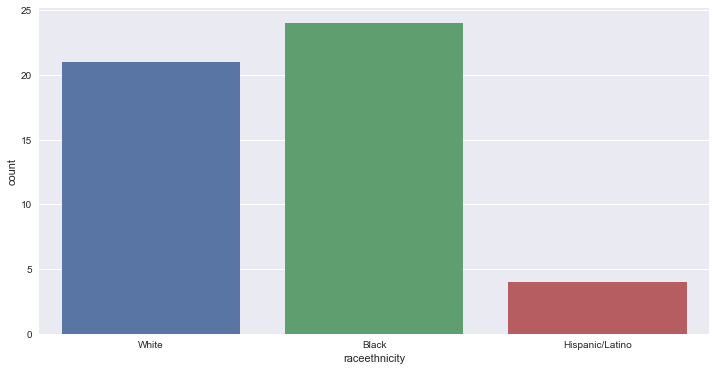

In [25]:
sns.countplot(rf['raceethnicity'])

Results: Of those killed in NY, 48% were black, 40% were white, 8% were hispanic

Let's see how this compares to the population numbers

In [26]:
# Population percentages from 2010 US Census Data
# white, black, hispanic = [69.9,17.7,19] (NY)
# white, black, hispanic = [72.4,12.6,16.3] (US)

Poverty Numbers

In [27]:
#ny poverty numbers by race in 2016 
# source: https://www.kff.org/other/state-indicator/poverty-rate-by-raceethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
# Poverty rate for the population as a whole is 12.7%

# white,black,hispanic = [9,22,20] (US) 
# white,black,hispanic = [8,17,19] (NY)